In [1]:
import latexify
import random
import math
import numpy as np
from optimization_algorithms_tools.algorithms import SimulatedAnnealing
from optimization_algorithms_tools.problems import ProblemBase, ContinuousFunctionBase

In [2]:
@latexify.with_latex
def simple_example(x):
    return (x-6)**2

simple_example_bounds = np.asarray([[0, 31]])
simple_example_obj = ContinuousFunctionBase(simple_example, simple_example_bounds)
simple_example

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x25f5e8de980>

In [3]:
# Adding debug = 1 to print initial and final solution
sa = SimulatedAnnealing(max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=1)

In [4]:
sa.run(simple_example_obj)

Simulated annealing is initialized:
current value = 1.4991750928480354, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 8.615165597749296e-08, curr temp:9.97938882337113e-05, curr best: sol: [5.99970648]


In [5]:
# Adding debug=2 (debug>1) for hand iteration tracing
sa_hand_iter = SimulatedAnnealing(max_iter=100, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=2)

In [6]:
sa_hand_iter.run(simple_example_obj)

Simulated annealing is initialized:
current value = 277.37122708589555, current temp=1000
curr iter: 1, curr value: 92.34660668253584, curr best value: 69.76565198548583, curr temp:1000, curr best: sol: [14.35258355]
curr iter: 2, curr value: 7.56706184061711, curr best value: 0.0008031946781369706, curr temp:900.0, curr best: sol: [5.97165931]
curr iter: 3, curr value: 78.15518817147762, curr best value: 0.0008031946781369706, curr temp:810.0, curr best: sol: [5.97165931]
curr iter: 4, curr value: 0.006763381990003492, curr best value: 0.0008031946781369706, curr temp:729.0000000000001, curr best: sol: [5.97165931]
curr iter: 5, curr value: 91.97526411638123, curr best value: 0.0008031946781369706, curr temp:656.1, curr best: sol: [5.97165931]
curr iter: 6, curr value: 395.58508249748365, curr best value: 0.0008031946781369706, curr temp:590.4900000000001, curr best: sol: [5.97165931]
curr iter: 7, curr value: 170.28330270400627, curr best value: 0.0008031946781369706, curr temp:531.4

global minimum: x = 6.0000, f(x) = 0.0000


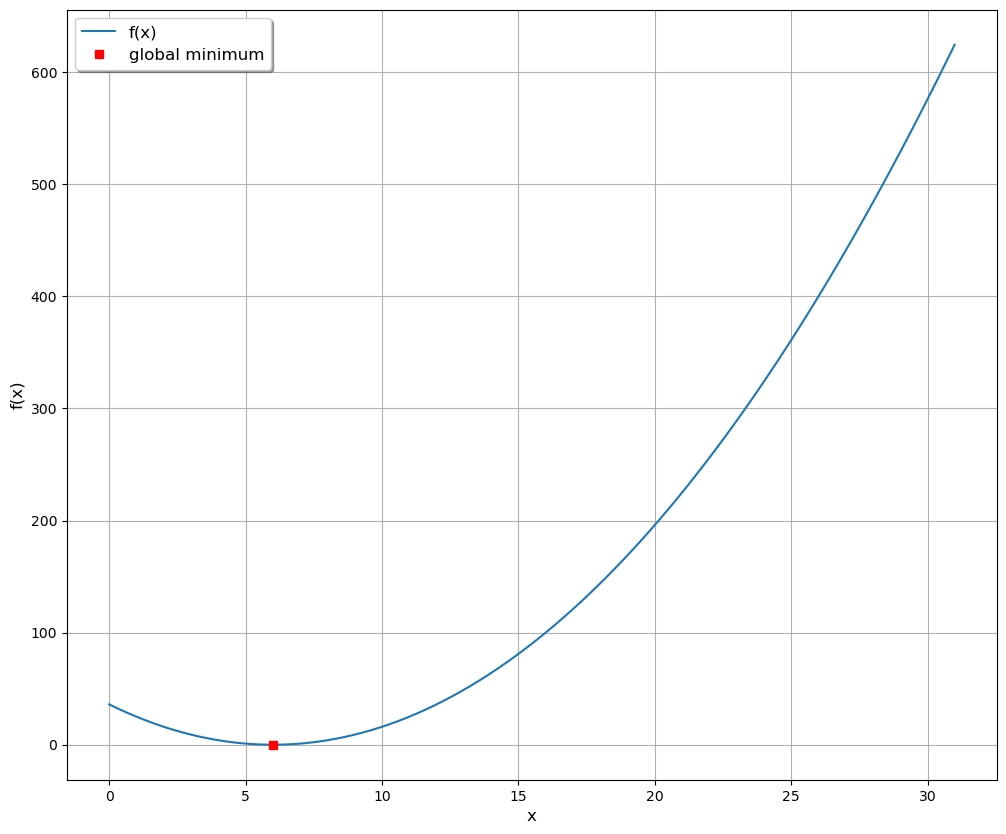

In [7]:
simple_example_obj.plot(sa_hand_iter.s_best)

In [8]:
def Bohachevsky(x_1, x_2):
    return x_1**2 +2*(x_2**2)-0.3*np.cos(3*np.pi*x_1)-0.4*np.cos(4*np.pi*x_2)+0.7

Bohachevsky_bounds = np.asarray([[-100, 100], [-100, 100]])
Bohachevsky_obj = ContinuousFunctionBase(Bohachevsky, Bohachevsky_bounds, 5)

In [9]:
sa.run(Bohachevsky_obj)

Simulated annealing is initialized:
current value = 17615.88125676451, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.12749901136348885, curr temp:9.97938882337113e-05, curr best: sol: [ 0.09428011 -0.01522999]


global minimum: x = 0.0943, -0.0152, f(x) = 0.1275


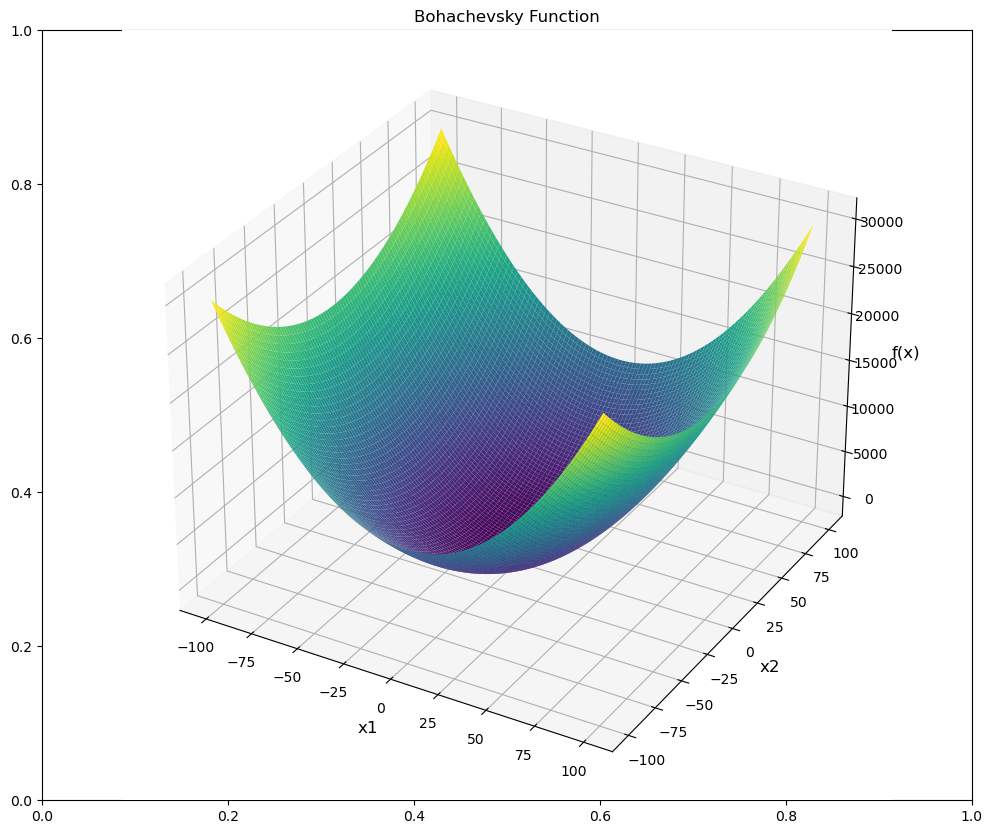

In [10]:
Bohachevsky_obj.plot(sa.s_best,'Bohachevsky Function')

In [11]:
@latexify.with_latex
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = ContinuousFunctionBase(bukin, bukin_bounds, 5)
bukin

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x25f733e9690>

In [12]:
sa.run(bukin_obj)

Simulated annealing is initialized:
current value = 151.51031559603177, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.18006931404232926, curr temp:9.97938882337113e-05, curr best: sol: [-12.5687985    1.57974457]


global minimum: x = -12.5688, 1.5797, f(x) = 0.1801


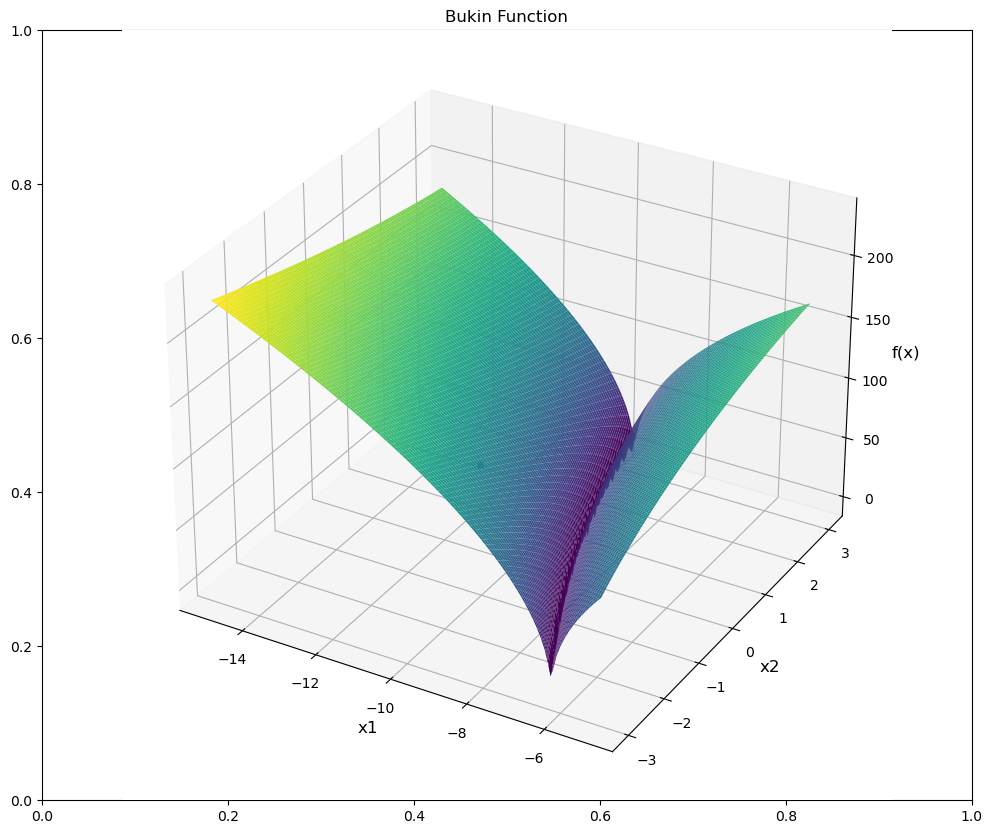

In [13]:
bukin_obj.plot(sa.s_best,'Bukin Function')

In [14]:
pi = math.pi
@latexify.with_latex
def gramacy_and_lee(x):
    return math.sin(10*pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = ContinuousFunctionBase(gramacy_and_lee, gramacy_and_lee_bounds, .1)
gramacy_and_lee

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x25f6edaffd0>

In [15]:
sa.run(gramacy_and_lee_obj)

Simulated annealing is initialized:
current value = 0.5496269300954446, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: -0.8690110982473502, curr temp:9.97938882337113e-05, curr best: sol: [0.54857248]


global minimum: x = 0.5486, f(x) = -0.8690


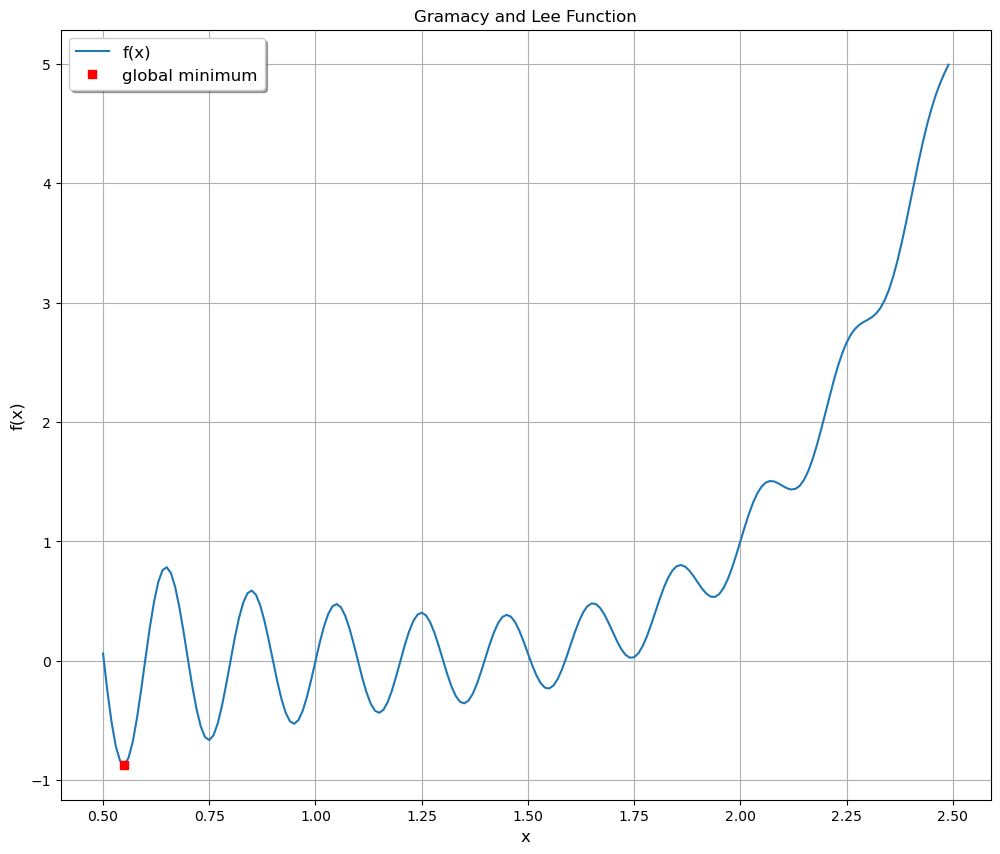

In [16]:
gramacy_and_lee_obj.plot(sa.s_best,'Gramacy and Lee Function')

In [17]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=ContinuousFunctionBase(griewank, griewank_bounds, 10)

In [18]:
sa.run(griewank_1d)

Simulated annealing is initialized:
current value = 28.674455904248298, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 2.23028228290012e-05, curr temp:9.97938882337113e-05, curr best: sol: [-0.00667709]


global minimum: x = -0.0067, f(x) = 0.0000


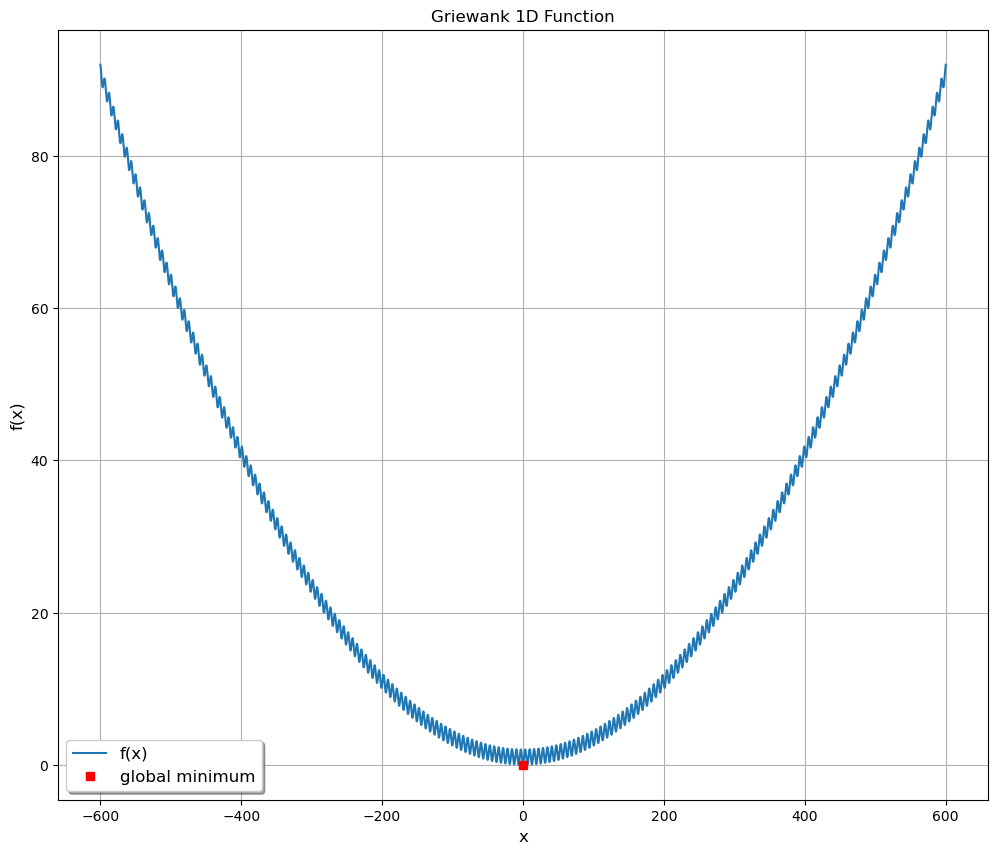

In [19]:
griewank_1d.plot(sa.s_best,'Griewank 1D Function')

In [20]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=ContinuousFunctionBase(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

In [21]:
sa.run(griewank_2d)

Simulated annealing is initialized:
current value = 28.004364904550275, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.09202243549838085, curr temp:9.97938882337113e-05, curr best: sol: [-12.81230787   8.80704677]


global minimum: x = -12.8123, 8.8070, f(x) = 0.0920


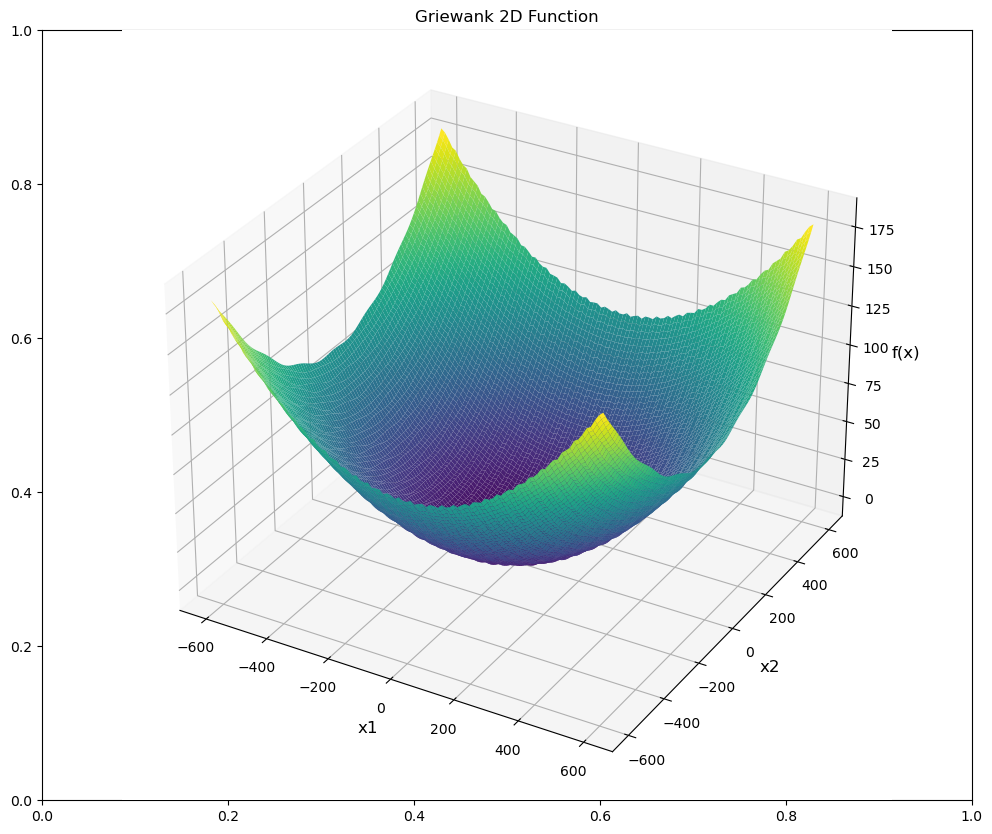

In [22]:
griewank_2d.plot(sa.s_best,'Griewank 2D Function')

In [23]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=ContinuousFunctionBase(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

In [24]:
# Changing the parameters for SA for more complex problem
sa = SimulatedAnnealing(max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9, debug=1)

In [26]:
sa.run(griewank_3d)